In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import average_precision_score, precision_recall_curve, f1_score
from PIL import Image
from skimage.color import rgb2gray
from scipy import ndimage as ndi
import cv2
import os
from os import listdir
from sklearn.utils import shuffle
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from numpy.random import randint
from numpy.random import rand
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
import pickle
import tensorflow as tf
from numpy.random import randn
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from tqdm import tqdm

2024-02-01 12:00:04.261882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_path = "/Users/user/Downloads/tomato_dataset/train"
valid_path = "/Users/user/Downloads/tomato_dataset/valid"
test_path = "/Users/user/Downloads/tomato_dataset/test"

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 25


# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and validation
try:
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical'  # Assuming you have multiple classes
    )

    validation_generator = test_datagen.flow_from_directory(
        valid_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Continue with the rest of your code (e.g., model training) here
    
except OSError as e:
    print(f"Error: {e}")
    print("Ensure that you are closing any opened files or handles in your code.")


Found 18345 images belonging to 10 classes.
Found 4617 images belonging to 10 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Assuming you have 11 classes
num_classes = 10

# Cell 3 (Define your model)
model = Sequential()

try:
    # Add Convolutional layers, MaxPooling layers, and Flatten
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add more Convolutional layers, MaxPooling layers, as needed

    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))

    # Output layer with the correct number of units (classes) and softmax activation
    model.add(Dense(num_classes, activation="softmax"))

    EPOCHS = 50
    INIT_LR = 1e-3
    BS = 25

    opt = Adam(learning_rate=INIT_LR)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # Continue with the rest of your code (e.g., model training) here

except Exception as e:
    print(f"Error: {e}")
    print("Ensure that you are closing any opened files or handles in your code.")

In [5]:
# Cell 4 (Training code)
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        verbose=1
    )

except Exception as e:
    print(f"Error: {e}")
    print("Ensure that you are closing any opened files or handles in your code.")

Epoch 1/50
734/734 [==============================] - 209s 284ms/step - loss: 2.1461 - accuracy: 0.2121 - val_loss: 1.5031 - val_accuracy: 0.5062
Epoch 2/50
734/734 [==============================] - 205s 279ms/step - loss: 1.5446 - accuracy: 0.4334 - val_loss: 0.9560 - val_accuracy: 0.7009
Epoch 3/50
734/734 [==============================] - 191s 260ms/step - loss: 1.2518 - accuracy: 0.5394 - val_loss: 0.7520 - val_accuracy: 0.7492
Epoch 4/50
734/734 [==============================] - 191s 260ms/step - loss: 1.1143 - accuracy: 0.5941 - val_loss: 0.9442 - val_accuracy: 0.6686
Epoch 5/50
734/734 [==============================] - 194s 264ms/step - loss: 1.0426 - accuracy: 0.6109 - val_loss: 0.6597 - val_accuracy: 0.7672
Epoch 6/50
734/734 [==============================] - 194s 264ms/step - loss: 0.9975 - accuracy: 0.6328 - val_loss: 0.7149 - val_accuracy: 0.7630
Epoch 7/50
734/734 [==============================] - 190s 258ms/step - loss: 0.9574 - accuracy: 0.6484 - val_loss: 0.7275 -

In [6]:
from tensorflow.keras.models import load_model

# Save the model
model.save("keras_model.h5")  # Replace "keras_model.h5" with the desired path and filename

# Load the model
loaded_model = load_model("keras_model.h5")


/Users/user/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("keras_model.h5")

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

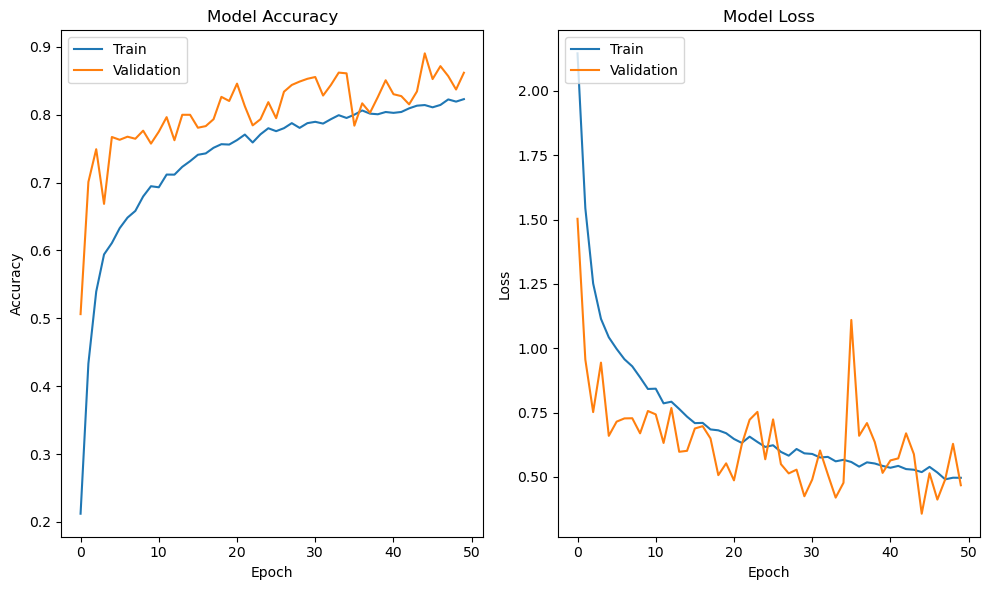

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

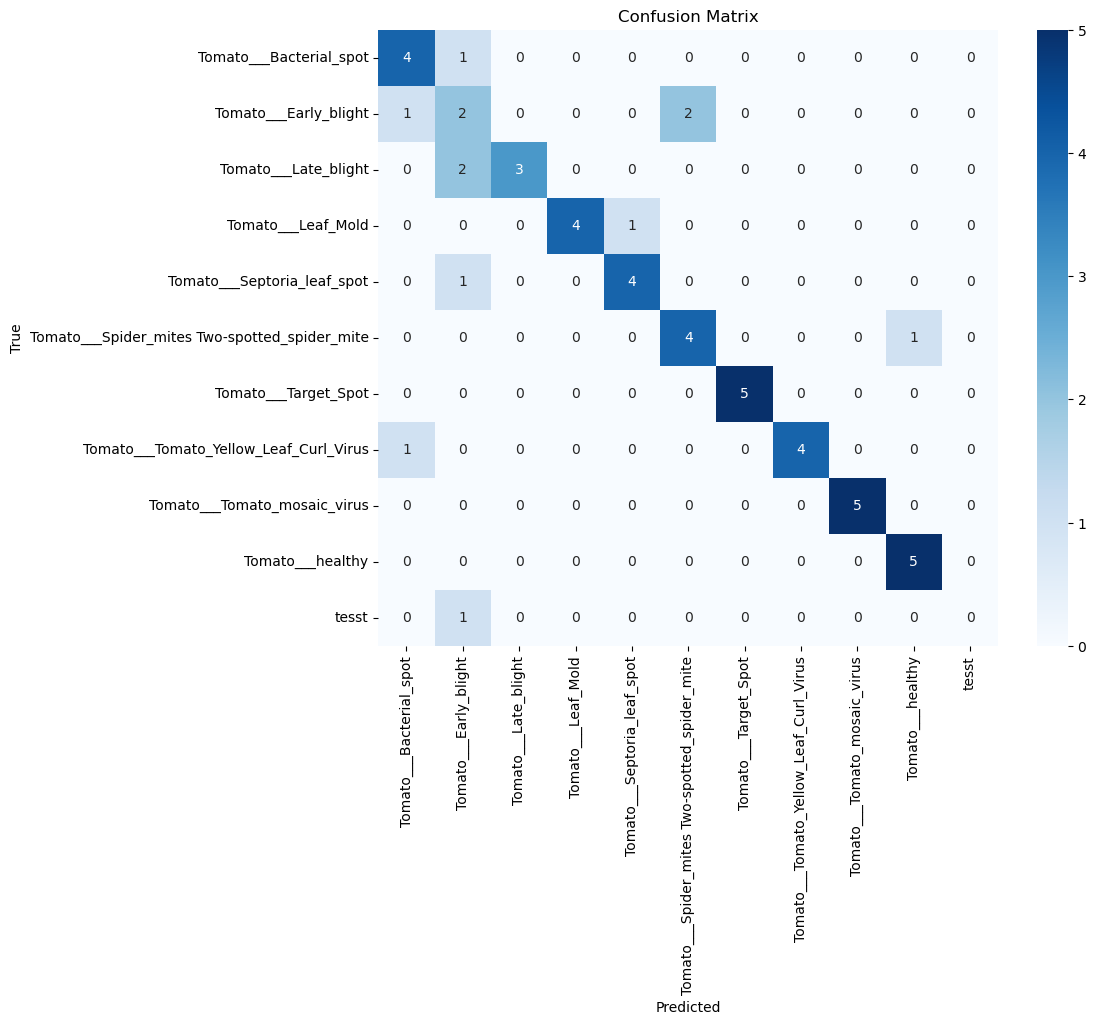

In [45]:
# Get the true labels and predicted labels
true_labels = test_generator.classes
predicted_labels = predicted_classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Path to your test data
test_path = "/Users/user/Downloads/tomato_dataset/test"

# Load the model
model = load_model("keras_model.h5")

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have multiple classes
    shuffle=False  # Important for tracking predictions and true labels
)

# Make predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_classes)
conf_matrix = confusion_matrix(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Found 51 images belonging to 11 classes.
2/2 [==============================] - 0s 25ms/step
Accuracy: 0.7843
Confusion Matrix:
[[4 1 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 2 0 0 0 0 0]
 [0 2 3 0 0 0 0 0 0 0 0]
 [0 0 0 4 1 0 0 0 0 0 0]
 [0 1 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 1 0]
 [0 0 0 0 0 0 5 0 0 0 0]
 [1 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 5 0]
 [0 1 0 0 0 0 0 0 0 0 0]]
Precision: 0.8091
Recall: 0.7843


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# One-hot encode the true labels
y_true_onehot = keras.utils.to_categorical(validation_generator.classes, num_classes)

# Predict probabilities for validation set
yhat_probs = model.predict(validation_generator, verbose=1)

# Predict crisp classes for validation set
yhat_classes = np.argmax(yhat_probs, axis=1)

# One-hot encode the predicted labels
y_pred_onehot = keras.utils.to_categorical(yhat_classes, num_classes)

# Confusion matrix
matrix = multilabel_confusion_matrix(y_true_onehot, y_pred_onehot)
print(matrix)


185/185 [==============================] - 8s 45ms/step
[[[3842  350]
  [ 393   32]]

 [[3611  526]
  [ 408   72]]

 [[3817  337]
  [ 433   30]]

 [[3771  376]
  [ 434   36]]

 [[3843  338]
  [ 393   43]]

 [[3743  423]
  [ 402   49]]

 [[3804  356]
  [ 421   36]]

 [[3696  431]
  [ 439   51]]

 [[3702  451]
  [ 417   47]]

 [[3565  571]
  [ 419   62]]]


Found 51 images belonging to 11 classes.
Class Indices: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
3/3 [==============================] - 0s 30ms/step


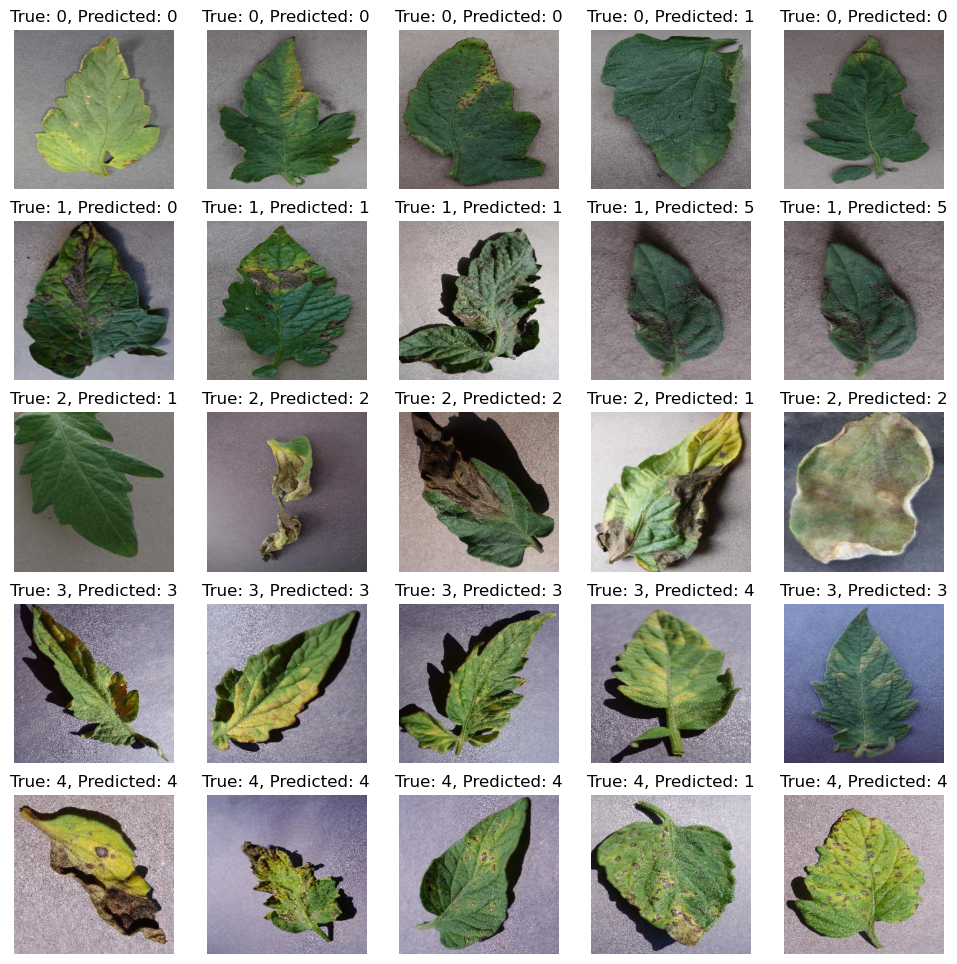

In [10]:
# Cell 5 (Prediction code)
try:
    # Load the test data with the same ImageDataGenerator settings
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',  # Assuming you have multiple classes
        shuffle=False  # Important for tracking predictions and true labels
    )

    # Get the class indices for later use
    class_indices = train_generator.class_indices
    print("Class Indices:", class_indices)

    # Make predictions
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)

    # Get true labels
    true_labels = test_generator.classes

    # Get filenames for visualization
    filenames = test_generator.filenames

    # Display some correctly predicted images
    plt.figure(figsize=(12, 12))
    for i in range(25):  # Adjust the number of images to display
        plt.subplot(5, 5, i + 1)
        plt.imshow(plt.imread(os.path.join(test_path, filenames[i])))
        plt.title(f"True: {true_labels[i]}, Predicted: {predicted_classes[i]}")
        plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Error: {e}")
    print("Ensure that you are closing any opened files or handles in your code.")


Found 51 images belonging to 11 classes.
Class Indices: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9, 'tesst': 10}
2/2 [==============================] - 0s 28ms/step


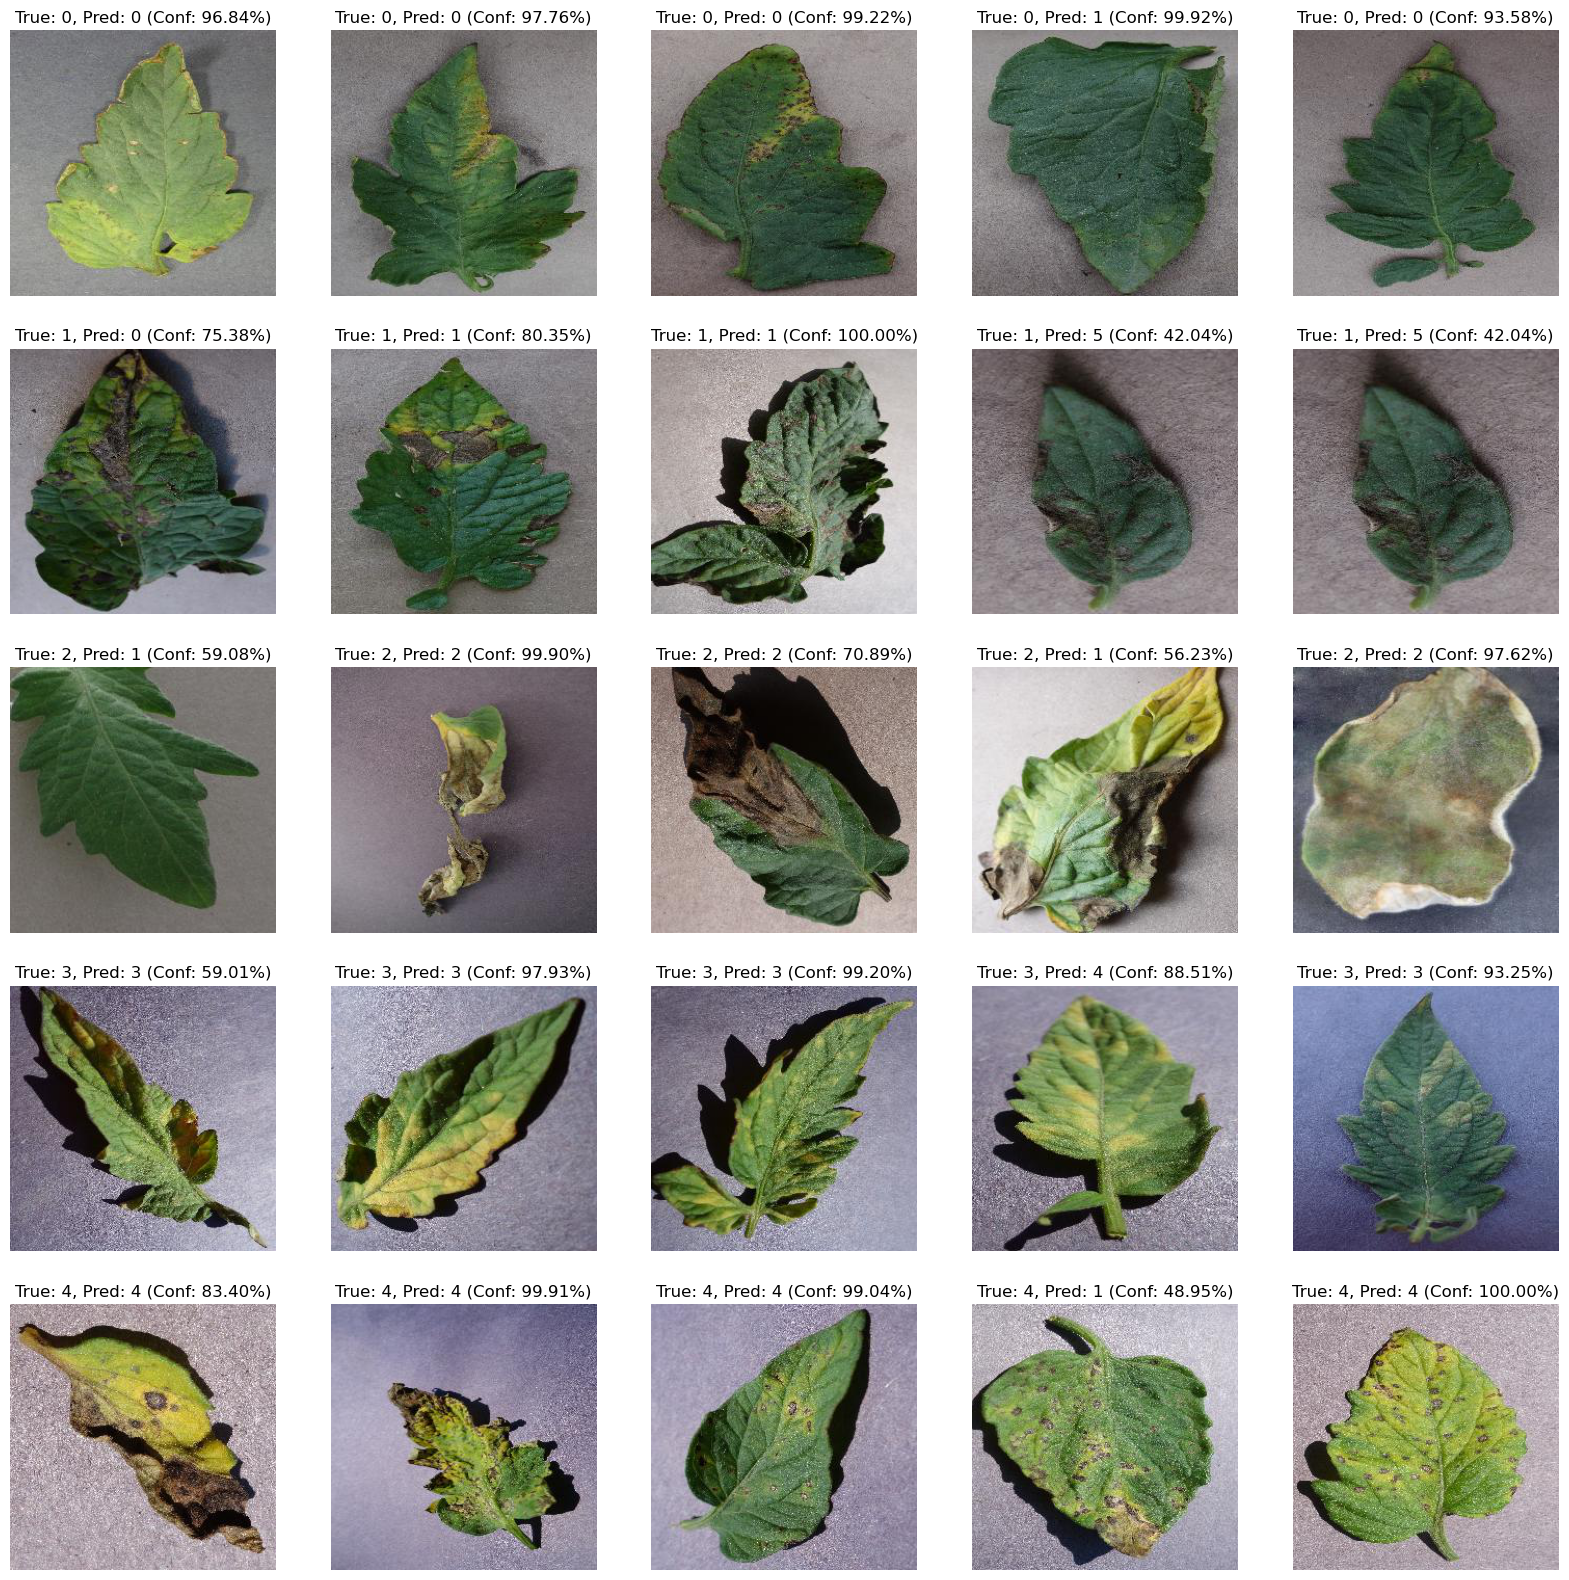

In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Path to your test data
test_path = "/Users/user/Downloads/tomato_dataset/test"

# Load the model
model = load_model("keras_model.h5")

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have multiple classes
    shuffle=False  # Important for tracking predictions and true labels
)

# Get the class indices for later use
class_indices = test_generator.class_indices
print("Class Indices:", class_indices)

# Make predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Get filenames for visualization
filenames = test_generator.filenames

# Display some correctly predicted images with confidence levels
plt.figure(figsize=(20, 20))
for i in range(25):  # Adjust the number of images to display
    plt.subplot(5, 5, i + 1)
    plt.imshow(plt.imread(os.path.join(test_path, filenames[i])))

    # Get the predicted class and corresponding confidence
    predicted_class = predicted_classes[i]
    confidence = predictions[i][predicted_class] * 100  # Confidence in percentage

    plt.title(f"True: {true_labels[i]}, Pred: {predicted_class} (Conf: {confidence:.2f}%)")
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 79ms/step


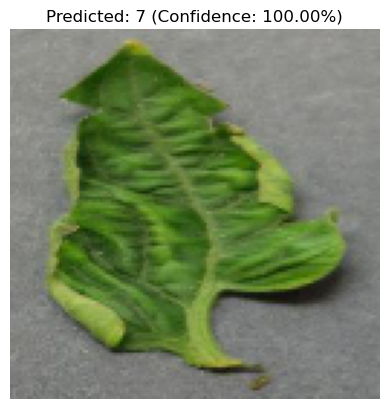

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Define image dimensions
img_width, img_height = 128, 128

# Path to your single test image
single_image_path = "/Users/user/Downloads/06485576-7a6f-468b-b35d-f4473897fc84___UF.GRC_YLCV_Lab 01485.JPG"  # Replace with the actual path

# Load the model
model = load_model("keras_model.h5")

# Load and preprocess the single image
img = image.load_img(single_image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to match the preprocessing in the original code

# Make the prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
confidence = prediction[0][predicted_class] * 100  # Confidence in percentage

# Display the image and prediction information
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} (Confidence: {confidence:.2f}%)")
plt.axis('off')
plt.show()


Class Indices: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9, 'tesst': 10}
1/1 [==============================] - 0s 56ms/step


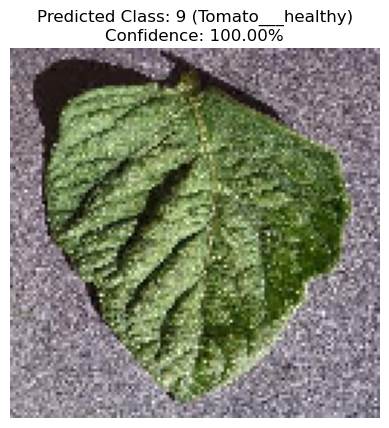

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os
import matplotlib.pyplot as plt

# Define image dimensions
img_width, img_height = 128, 128

# Replace this line with the actual path to your image
image_path = "/Users/user/Downloads/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_flipTB.JPG" 

# Load the image for prediction
img = load_img(image_path, target_size=(img_width, img_height))

# Load the model
model = load_model("keras_model.h5")

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Get the class indices for later use
class_indices = {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2,
                 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4,
                 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6,
                 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8,
                 'Tomato___healthy': 9, 'tesst': 10}
print("Class Indices:", class_indices)

# Load an example image for prediction
image_path = os.path.join(test_path, "/Users/user/Downloads/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_flipTB.JPG")
img = load_img(image_path, target_size=(img_width, img_height))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image
img_array = test_datagen.standardize(img_array)

# Make prediction for the example image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
confidence = prediction[0][predicted_class] * 100  # Confidence in percentage

# Display the example image with prediction details
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class} ({list(class_indices.keys())[predicted_class]})\n"
          f"Confidence: {confidence:.2f}%")
plt.axis('off')
plt.show()
